Previous results stalled at ~1K epochs. Next set of improvements:
1. More training data ✔
2. Better submodel architecture
3. Add cross-validation to training loop
4. Add reporting to training loop ✔
5. Convert each submodel to an ensemble

In [1]:
# from snap import get_images, purge_opaque
# get_images('pokedex.txt', '.data/') # takes 5~10 mins
# purge_opaque('.data/', dry_run=True) # broken transparency can train the model to paint solid squares

In [2]:
# import dcgan_v4 as v4
# dataset = v4.load_dataset('.data/')
# next(v4.get_sample(dataset))
# pass

In [3]:
# generator, discriminator = v4.make_generator(), v4.make_discriminator()
# v4.train(generator, discriminator, dataset, epochs=10)
# pass # failed: model kept drawing a single line on the left axis

In [4]:
# import dcgan_v5 as v5
# v5.train(v5.make_generator(), v5.make_discriminator(), v5.load_dataset('.data/'), 10)
# pass # failed: model stopped learning

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060, compute capability 8.6
Found 1881 files belonging to 1 classes.


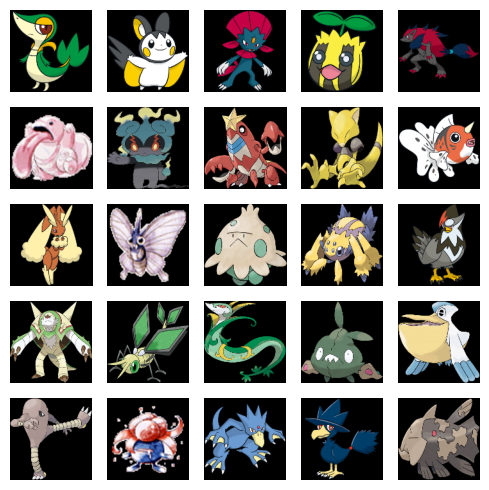

In [5]:
import dcgan_v6 as v6 # v5 w/ RGB instead of RGBA to include opaque images in training set
dataset = v6.load_dataset('.data/')
next(v6.get_sample(dataset))
pass

In [6]:
g, d = v6.make_generator(), v6.make_discriminator()

Generated Result (1704690428_final):


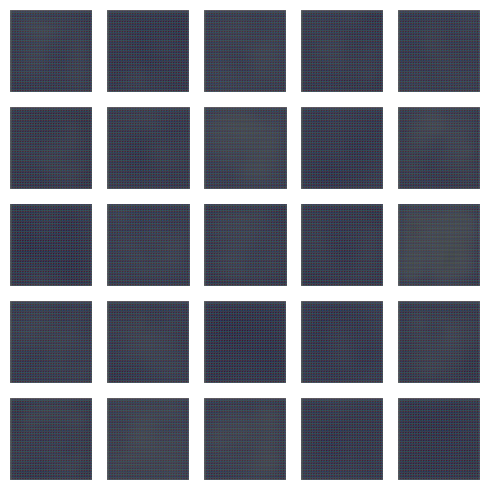

dcgan_v6.train() completed in 53.3s


In [7]:
v6.train(g, d, dataset, 3)
pass # failed: model stopped learning

*Dropping the alpha channel has helped some but it seems like the task is too complex to use this tutorial out of the box. Next I'll try tuning the discriminator by itself to categorize "pokemon" vs "not pokemon", and then to categorize pokemon by gen (with `-1` or `0` as the value for "not pokemon"). Once that's trained, add it back into the DCGAN with `trainable=False` to see if that helps the generator learn more.*